Step 1: Import Required Libraries

In [1]:
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For heatmaps and plots
from sklearn.cluster import KMeans  # K-Means clustering
from sklearn.metrics import silhouette_score  # For evaluating cluster quality
from scipy.cluster.hierarchy import dendrogram, linkage  # For hierarchical clustering

Step 2: Load the Processed Dataset

In [2]:
# Define file path for processed data
file_path = "../data/processed_data.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3536,3918,-0.016289,708,-0.021301,1.725758,36
1,0,2794,3926,-0.016289,708,-0.012620,1.725758,36
2,0,3044,913,-0.007118,708,-0.019234,1.725758,36
3,0,2985,1910,-0.016289,708,-0.012620,1.725758,36
4,0,2984,2911,-0.016289,708,-0.012620,1.725758,36


Step 3: Finding the Optimal Number of Clusters (Elbow Method)

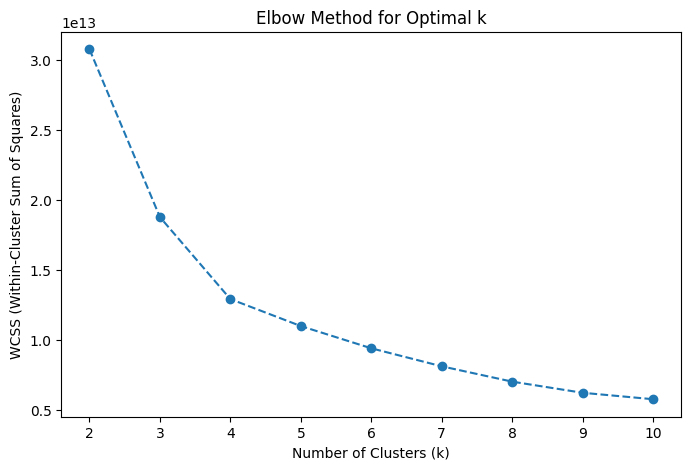

In [3]:
# Apply K-Means for different values of k
wcss = []  # Within-Cluster Sum of Squares
K_range = range(2, 11)  # Test k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

Step 4: Evaluating Clusters using Silhouette Score

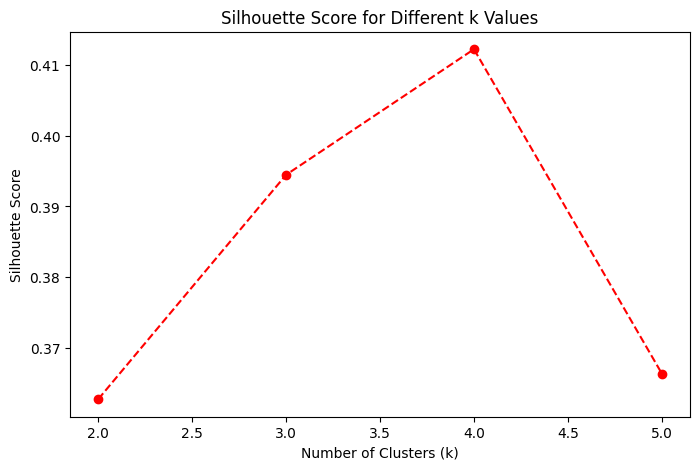

In [5]:
# Reduce range to 2-6 clusters for speed
K_range = range(2, 6)

# Use a sample if dataset is large
df_sample = df.sample(n=500, random_state=42) if len(df) > 1000 else df

# Compute silhouette scores (Reduced iterations)
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)  # Fewer iterations
    cluster_labels = kmeans.fit_predict(df_sample)  # Use sample data
    silhouette_avg = silhouette_score(df_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k Values")
plt.show()

Step 5: Apply K-Means Clustering

In [6]:
# Based on the elbow and silhouette method, choose the best k (e.g., 4)
optimal_k = 4

# Train K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

# Display first few rows with cluster assignments
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,0,3536,3918,-0.016289,708,-0.021301,1.725758,36,0
1,0,2794,3926,-0.016289,708,-0.012620,1.725758,36,0
2,0,3044,913,-0.007118,708,-0.019234,1.725758,36,0
3,0,2985,1910,-0.016289,708,-0.012620,1.725758,36,0
4,0,2984,2911,-0.016289,708,-0.012620,1.725758,36,0


Step 6: Hierarchical Clustering (Comparison)

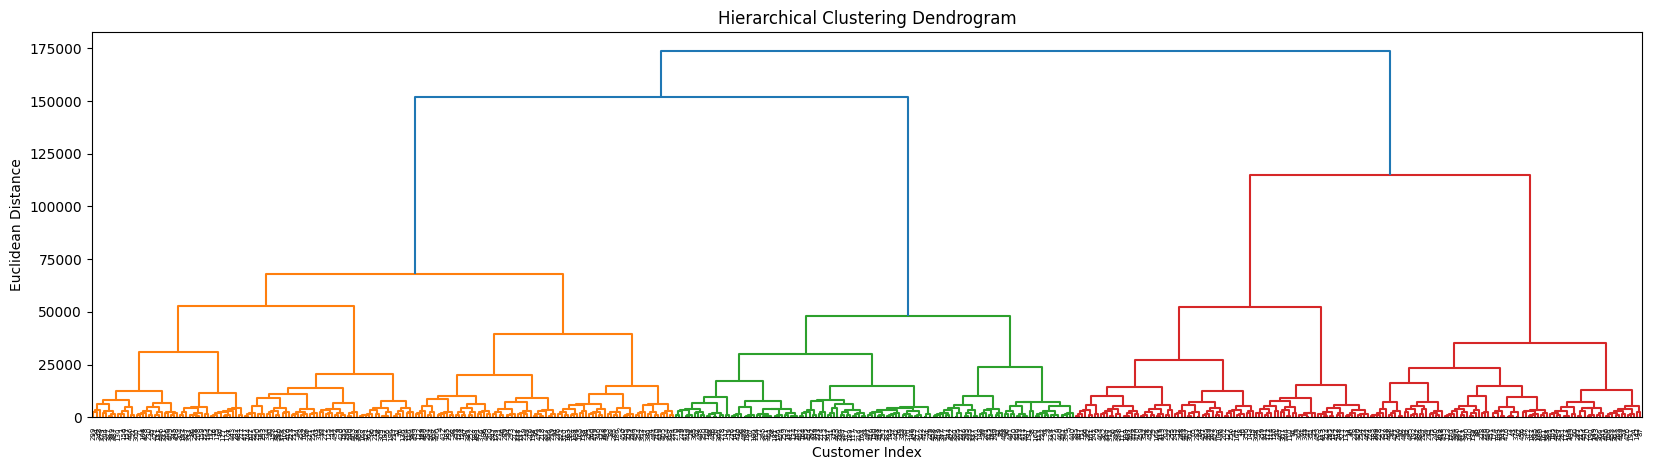

In [10]:
# Reduce dataset size for hierarchical clustering
df_sample = df.sample(n=500, random_state=42) if len(df) > 1000 else df

# Perform hierarchical clustering using Ward's method
linked = linkage(df_sample.drop(columns=["Cluster"]), method="ward")

# Plot Dendrogram
plt.figure(figsize=(20, 5))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Euclidean Distance")
plt.show()

Step 7: Save Cluster Assignments

In [11]:
# Save the dataset with cluster labels
df.to_csv("../results/cluster_assignments.csv", index=False)

print("\nCluster assignments saved successfully as 'cluster_assignments.csv'")


Cluster assignments saved successfully as 'cluster_assignments.csv'
